# Import libraries

In [15]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

seed = 42
rng = RandomState(seed)

df = pd.read_csv('Model.csv')

X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(12529, 60) (12529,)


# train-test split

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (10023, 60) (10023,)
Test set:  (2506, 60) (2506,)


# cross val score with ROC-AUC

In [17]:
def cross_validation_score(estimator):
    scores = cross_val_score(
        estimator, X_train, y_train, cv=3, n_jobs=-1,
        scoring='roc_auc'
    )
    
    return scores.mean(), scores.std()


def plot_cross_validation(title, X, Y, error, xlabel, ylabel='ROC AUC'):
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

# svm with linear karnel

In [18]:
from sklearn.svm import SVC

title = 'Change kernel_linear, C=1.0'
xlabel = 'Kernel'
kernels = ['linear']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)
print(means)
print(stddevs)

100%|██████████| 1/1 [23:13<00:00, 1393.75s/it]

[0.7111106173806911]
[0.01090746921593349]


In [19]:
print(means)

[0.7111106173806911]


In [20]:
print(stddevs)

[0.01090746921593349]


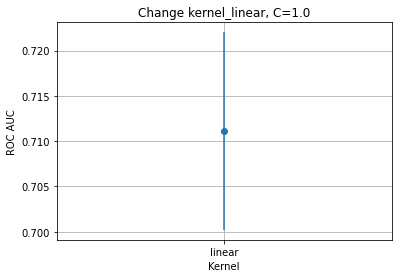

In [21]:
plot_cross_validation(title, kernels, means, stddevs, xlabel)
#plt.savefig('SVM_change_kernel.png', bbox_inches='tight')
plt.show()

# svm with polynomial karnel

100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

[0.580095544799665]
[0.008426447678469048]


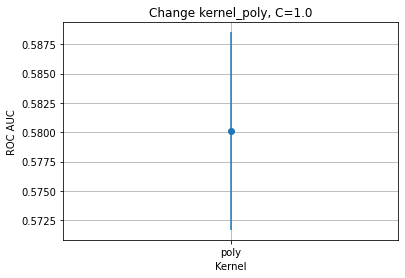

In [22]:
title = 'Change kernel_poly, C=1.0'
xlabel = 'Kernel'
kernels = ['poly']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)
print(means)
print(stddevs)

plot_cross_validation(title, kernels, means, stddevs, xlabel)
#plt.savefig('SVM_change_kernel.png', bbox_inches='tight')
plt.show()

# svm with rbf karnel

100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

[0.5143126555848078]
[0.007174176060865069]


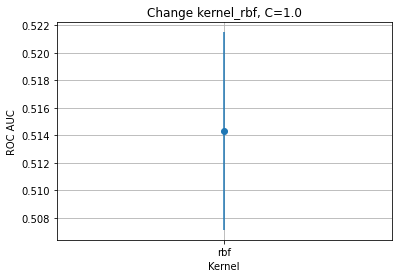

In [23]:
title = 'Change kernel_rbf, C=1.0'
xlabel = 'Kernel'
kernels = ['rbf']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)
print(means)
print(stddevs)

plot_cross_validation(title, kernels, means, stddevs, xlabel)
#plt.savefig('SVM_change_kernel.png', bbox_inches='tight')
plt.show()

# svm with sigmoid karnel

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

[0.4990610415375933]
[0.010423355794073084]


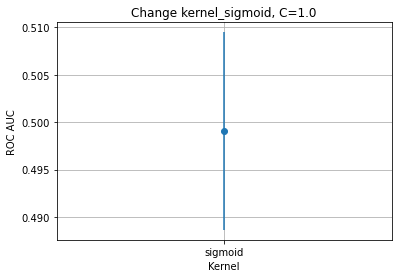

In [24]:
title = 'Change kernel_sigmoid, C=1.0'
xlabel = 'Kernel'
kernels = ['sigmoid']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)
print(means)
print(stddevs)

plot_cross_validation(title, kernels, means, stddevs, xlabel)
#plt.savefig('SVM_change_kernel.png', bbox_inches='tight')
plt.show()

# change karnel, c=1.0

100%|██████████| 4/4 [22:58<00:00, 344.73s/it]


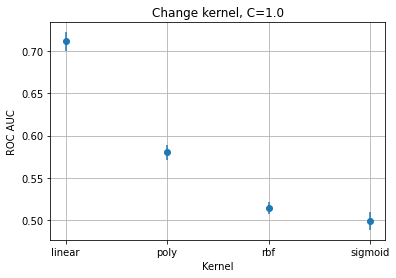

In [25]:
title = 'Change kernel, C=1.0'
xlabel = 'Kernel'
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
means = []
stddevs = []

for kernel in tqdm(kernels):
    clf = SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, kernels, means, stddevs, xlabel)
#plt.savefig('./figure/SVM_change_kernel.png', bbox_inches='tight')
plt.show()

# change c, karnel=linear

100%|██████████| 5/5 [2:14:24<00:00, 1612.90s/it]


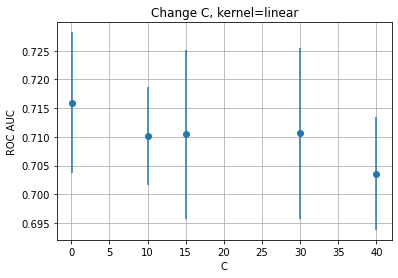

In [28]:
title = 'Change C, kernel=linear'
xlabel = 'C'
regularizations = [0.1, 10.0, 15.0, 30.0, 40.0]
means = []
stddevs = []

for C in tqdm(regularizations):
    clf = SVC(kernel='linear', C=C)
    mean, std = cross_validation_score(clf)
    means.append(mean)
    stddevs.append(std)

plot_cross_validation(title, regularizations, means, stddevs, xlabel)
#plt.savefig('./figure/SVM_change_C.png', bbox_inches='tight')
plt.show()


# ROC_AUC

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score
clf = SVC(kernel='linear', C=0.1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('ROC AUC on test set: ', roc_auc_score(y_test, y_pred))

Accuracy on test set:  0.6640063846767758
ROC AUC on test set:  0.6519419423305897


# Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


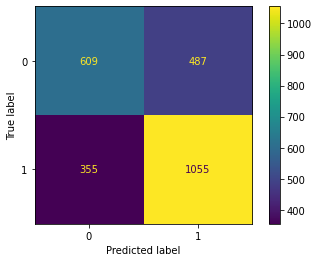

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
#plt.savefig('./figure/SVM_confmat.png')
plt.show()

# get number of support vectors for each class

In [32]:
print(clf.n_support_) 

[2596 2600]
